## Modulos

In [2]:
import numpy as np
import pandas as pd

from scipy.stats import *
from math import sqrt
from matplotlib import pyplot as plt

## Tabelas 

In [3]:
TabelaG = pd.read_csv('TabelaG.csv')
TabelaG.head()

,α,0.20,0.15,0.10,0.05,0.01
0,N,0.900,0.925,0.950,0.975,0.995
1,1,0.684,0.726,0.776,0.842,0.929
2,2,0.565,0.597,0.642,0.708,0.828
3,3,0.494,0.525,0.564,0.624,0.733
4,4,0.446,0.474,0.510,0.565,0.669


In [4]:
TabelaH1 = pd.read_csv('TabelaH1.csv')
TabelaH1.head()

,i,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1,0.7071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.7071,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.6872,0.1677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.6646,0.2413,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.6431,0.2806,0.0875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
TabelaH2 = pd.read_csv('TabelaH2.csv')
TabelaH2.head()

,n,0.01,0.02,0.05,0.1,0.5,0.9,0.95,0.98,0.99
0,3,0.753,0.756,0.767,0.789,0.959,0.998,0.999,1.000,1.000
1,4,0.687,0.707,0.748,0.792,0.935,0.987,0.992,0.996,0.997
2,5,0.686,0.715,0.762,0.806,0.927,0.979,0.986,0.991,0.993
3,6,0.713,0.743,0.788,0.826,0.927,0.974,0.981,0.986,0.989
4,7,0.730,0.760,0.803,0.838,0.928,0.972,0.979,0.985,0.988


In [6]:
TabelaE = pd.read_csv('TabelaE.csv')
TabelaE.head()

,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.0,0.5000,0.4960,0.4920,0.4880,0.4840,0.4801,0.4761,0.4721,0.4681,0.4641
0.1,0.4602,0.4562,0.4522,0.4483,0.4443,0.4404,0.4364,0.4325,0.4286,0.4247
0.2,0.4207,0.4168,0.4129,0.4090,0.4052,0.4013,0.3974,0.3936,0.3897,0.3859
0.3,0.3821,0.3783,0.3745,0.3707,0.3669,0.3632,0.3594,0.3557,0.3520,0.3483
0.4,0.3446,0.3409,0.3372,0.3336,0.3300,0.3264,0.3228,0.3192,0.3156,0.3121


## Implementação

In [7]:
def HistogramaSimples(data):
    
    plt.hist(data, bins=20, color='blue', edgecolor='black')
    plt.title('Distribuição de Dados')
    plt.xlabel('Valores')
    plt.ylabel('Frequência')
    plt.grid(True)  
    plt.show()
    
def HistogramaComparativo(data):
    
    #data é um array de arrays
    
    plt.figure(figsize=(10,5))
    plt.title('Distribuição de Dados')
    plt.xlabel('Valores')
    plt.ylabel('Frequência')
    plt.grid(True)
    
    for i in range(len(data)):
        plt.hist(data[i], bins=20, color='blue', edgecolor='black', alpha=0.5)
    
    

In [46]:
def KolmogorovSmirnov(rol,alpha,tamanho,graf = True):
    
    print('\nKolmogorov-Smirnov\n')
    
    #H0 = Fobs(x) = Fesp(x)  
    #H1 = Fobs(x) != Fesp(x)
    
    
    
    #Dcalc = max{|Fesp(x) - Fob(x)|,|fsp(x) - Fob(x-1)|}
    #Fesp = Frequencia relativa
    #Fob = Frequencia relativa acumulada
    Media = rol.mean()
    Variancia = rol.var()
    DesvioPadrao = rol.std()
    mediana = np.median(rol)
    min = rol.min()
    maximum = rol.max()
    soma = rol.sum()
    
    
    
    
    if graf:
        HistogramaSimples(rol)
        print('Media = ',Media)
        print('Variancia = ',Variancia)
        print('DesvioPadrao = ',DesvioPadrao) 
        print("Mediana = ",mediana)   
        print("Minimo = ",min)
        print("Maximo = ",maximum)
        print("Soma = ",soma)    
        print("Contagem = ",tamanho)
    
    
    if tamanho <= 20:
    

    
        import pandas as pd
        Tabela = pd.DataFrame(columns=['xi','Fobs','Fa','Fra','zcalc','fesp','|fesp(xi) - fra(xi)|','|fesp(xi) - fra(xi-1)|'])
        
        
        tabG = {'0.20':1.07/sqrt(tamanho),'0.15':1.14/sqrt(tamanho),'0.10':1.22/sqrt(tamanho),'0.05':1.36/sqrt(tamanho),'0.025':1.48/sqrt(tamanho),'0.01':1.63/sqrt(tamanho),'0.005':1.73/sqrt(tamanho)}
        
        Tabela['xi'], Tabela['Fobs'] = np.unique(rol, return_counts=True)
        Tabela['Fa'] = Tabela['Fobs'].cumsum()
        Tabela['Fra'] = Tabela['Fa']/Tabela['Fobs'].sum() #Frequencia relativa acumulada --> Fob.sum = tamanho da rol
        Tabela['zcalc'] = (Tabela['xi'] - Media)/DesvioPadrao
        Tabela['fesp'] = norm.cdf(Tabela['zcalc'])
        Tabela['|fesp(xi) - fra(xi)|'] = abs(Tabela['fesp'] - Tabela['Fra'])
        Tabela['|fesp(xi) - fra(xi-1)|'] = abs(Tabela['fesp'] - Tabela['Fra'].shift(1))
        #Adicionando o primeiro item na coluna |fesp(xi) - fra(xi-1)|
        Tabela.loc[0,'|fesp(xi) - fra(xi-1)|'] = abs(Tabela.loc[0,'fesp'] - 0)
        
        #Dcalc = Maximo de |fesp(xi) - fra(xi)| e |fesp(xi) - fra(xi-1)|
        
        Dcalc = max(abs(Tabela['|fesp(xi) - fra(xi)|'].max()),abs(Tabela['|fesp(xi) - fra(xi-1)|'].max()))
        #Usar p-valores (Distribuição Normal inversa e verifica se p-valor >= alpha) ->  Hipotese H1,casso contrario H0
        
        #Dtab = TabelaG.loc[tamanho-1,alpha]
        Dtab = TabelaG.loc[tamanho-1,str(alpha)]
        
        if graf:
            Tabela
        
        #Se Dcalc < Dtab --> Aceita H0
        
        if Dcalc < Dtab:
            print('\nDcalc < Dtab --> Aceita H0')
            return True
            
        
        #Caso contrario --> Rejeita H0
        else:
            print('\nDcalc > Dtab --> Rejeita H0')
            return False
        
    else:
        
        #statistica, p_valor = kstest(rol, 'norm', args=(Media,DesvioPadrao))
        statistica, p_valor = shapiro(rol)
        
        
        if p_valor >= alpha:
            print('p-valor = ',p_valor)
            print('p-valor >= alpha --> Aceita H0')
            return True
        
        else:
            print('p-valor = ',p_valor)
            print('p-valor < alpha --> Rejeita H0')
            return False
    


In [9]:
def ShapiroWilk(rol,alpha,tamanho):
    
    print('\nShapiro-Wilk\n')
    print("\nHipotese:\n")
    print("H0 = A amostra segue uma distribuição normal")
    print("H1 = A amostra não segue uma distribuição normal")
    
    
    
    Media = rol.mean()
    Variancia = rol.var()
    DesvioPadrao = rol.std()
    mediana = np.median(rol)
    max = rol.max()
    min = rol.min()
    soma = rol.sum()
    
    
    print('Media = ',Media)
    print('Variancia = ',Variancia)
    print('DesvioPadrao = ',DesvioPadrao)
    print("Mediana = ",mediana)
    print("Minimo = ",min)
    print("Maximo = ",max)
    print("Soma = ",soma)    
    print("Contagem = ",tamanho)
    
    HistogramaSimples(rol)
    
    
    
    if tamanho <= 30:
    
    
        Tabela = pd.DataFrame(columns=['i','n-(i-1)','ain','xn-(i-1)','xi','ain(xn-(i-1)-xi'])
        
        Tabela['i'] = np.arange(1,(tamanho+1)/2)
        Tabela['n-(i-1)'] = tamanho - Tabela['i'] + 1
        Tabela['ain'] = TabelaH1.loc[tamanho-1].values[~np.isnan(TabelaH1.loc[tamanho-1].values)] #Solução Elegante -> usei masks para remover os NaN
        Tabela['xn-(i-1)'] = rol[Tabela['n-(i-1)'].astype(int)-1]
        Tabela['xi'] = rol[Tabela['i'].astype(int)-1]
        Tabela['ain(xn-(i-1)-xi'] = Tabela['ain']*(Tabela['xn-(i-1)']-Tabela['xi'])
        
        
        #b = somatorio de ain(xn-(i-1)-xi) (1,n/2)
        #wcalc= b² / Somatório de (xi - x|)²
        
        b = Tabela['ain(xn-(i-1)-xi'].sum()
        Wcalc = (b**2)/((rol - Media)**2).sum()
        Wc = TabelaH2.loc[tamanho-3, str(alpha)]
          
        print('\nTabela')    
        Tabela
        print('\n')
        
        print('Wcalc = ',Wcalc)
        print('Wc = ',Wc)
            
        
        if Wcalc >=  Wc:
            print('\nWcalc >= Wc --> Aceita H0')
            return True
        else:
            print('\nWcalc < Wc --> Rejeita H0')
            return False
            
        
       
      
    
    else:
        
        stat, p = shapiro(rol)
        
        if p > alpha:
            print('\np > alpha --> Aceita H0')
            
            return True
            
        else:
            print('\np < alpha --> Rejeita H0')
            return False
            
    

In [10]:
def Zscore(rol,alpha,M):
    
    
   print("Z-Score\n")
   print('Hipoteses:')
   print('H0 --> M = ',M)
   print('H1 --> M != ',M)

   sigmaXb = np.std(rol, ddof=1)/np.sqrt(len(rol))
   zCalc = (np.mean(rol)-M)/sigmaXb

   """
   Os valores críticos da estatística (zc) são apresentados na Tabela E do apêndice.
   Essa tabela fornece os valores críticos de zc tal que P(𝑍𝑐𝑎𝑙𝑐 > zc) = α
   (para um teste unilateral à direita).
   """

   zc = t.ppf(1-alpha/2, len(rol)-1)

   HistogramaSimples(rol)

   if abs(zCalc) > zc:
      print('\nZcalc > Zc --> Rejeita H0')
      return False
   else:
      print('\nZcalc <= Zc --> Aceita H0')
      return True
  
      
    
    
    

In [11]:
def Bartlett(rol,alpha,graf = True ):
    
    print("Bartlett\n")
    print('Hipoteses:')
    print('H0 --> As variancias são iguais')
    print('H1 --> As variancias não são iguais')
    
    #rol = lista de listas
    
    N = 0
    Ni = []
    Vari = []
    
    for i in range(len(rol)):
        N += len(rol[i])
        Ni.append(len(rol[i]))
        Vari.append(np.var(rol[i]))
    
    Sp2 = np.sum((np.array(Ni)-1)*(np.array(Vari)))/(N-len(rol))
    
    q = (N-len(rol))*np.log(Sp2) - np.sum((np.array(Ni)-1)*np.log(np.array(Vari)))
    c = 1 + (1/(3*(len(rol)-1)))*(np.sum(1/(np.array(Ni)-1))-1/(N-len(rol)))
    
    Bcalc = q/c
    
    X2c = chi2.ppf(1-alpha,len(rol)-1)
    
    if graf:
        HistogramaComparativo(rol)

    
    if Bcalc > X2c:
        print('\nBcalc > X2c --> Rejeita H0')
        return False
        
    else:        
        print('\nBcalc <= X2c --> Aceita H0')
        return True
    
    
    

In [12]:
def T_student_Independente(rol1,rol2,alpha):
    
    
    
    print("T-Student - Comparação de médias populacionais Independentes\n")
    
    
    print('Hipoteses:')
    print('H0 --> M1 = M2 ')
    print('H1 --> M1 != M2')
    
    
    n1,n2 = len(rol1),len(rol2)  
    var1,var2 = rol1.var(),rol2.var()
    mi1,mi2 = rol1.mean(),rol2.mean()
    d1,d2 = rol1.std(),rol2.std()
    max1,max2 = rol1.max(),rol2.max()
    min1,min2 = rol1.min(),rol2.min()
    soma1,soma2 = rol1.sum(),rol2.sum()
    
    
    print("Médias:",mi1,mi2)
    print("Variâncias:",var1,var2)
    print("Desvios Padrões:",d1,d2)
    print("Máximos:",max1,max2)
    print("Mínimos:",min1,min2)
    print("Somas:",soma1,soma2)
    print("Contagens:",n1,n2)
    
    HistogramaComparativo([rol1,rol2])
    
    
    if Bartlett([rol1,rol2],alpha):
        
        print("Caso 2 --> Sigma²1 == Sigma²2\n")
        
        Sp = sqrt(((n1-1)*var1 + (n2-1)*var2)/n1+n2-2)
        Tcalc = (mi1-mi2)/(Sp*(1/n1 + 1/n2)**1/2)        
        Tc = t.ppf(1-alpha/2,n1+n2-2)
        
    
    
    
    
    else:
        print("Caso 1 --> Sigma²1 != Sigma²2\n")
        
        Tcalc = (mi1 - mi2 )/((var1/n1)+(var2/n2))**2  # Estatistica T        
        V = ((var1/n1   +  var2/n2)**2)/   ( ((var1/n1)**2)/(n1-1)  +   ((var2/n2)**2)/(n2-1))  # Graus de liberdade        
        Tc = t.ppf(1-alpha/2,V)  # Valor critico
    
       
    
    # Verificar hipoteses
    
    if Tcalc >= Tc:
       
       print('\nTalc >= Tc --> Aceita H0')
       return True
       
    else:
        
        print('\nWcalc < Wc --> Rejeita H0')
        return False
        
        
        
        
        

In [13]:
def T_student_rols_Emparelhadas(rol1,rol2,alpha,graf = False):
    
    
    print("T-Student - Comparação de médias populacionais Emparelhadas\n")
    
    
    print('Hipoteses:')
    print('H0 --> Md = 0 ')
    print('H1 --> Md != 0')
    
    
    if KolmogorovSmirnov(rol1,alpha,len(rol1),graf=False) and  KolmogorovSmirnov(rol2,alpha,len(rol2),graf=False):
    
    
        if Bartlett([rol1,rol2],alpha,graf):
            
            tamanho = (len(rol1)+len(rol2))/2
            rolD = rol1.mean() - rol2.mean()
            Dmean = rolD.mean()
            Sd = ((rolD - Dmean)**2/tamanho-1)**1/2
            Tcalc = Dmean - rolD/(Sd/(tamanho)**1/2)
            
            Tc = t.ppf(1-alpha/2,tamanho-1)
            print('Tc = ',Tc)
            print('Tcalc = ',Tcalc)
            
            HistogramaComparativo([rol1,rol2])
        
            if Tcalc > Tc:
                print('\nTcalc < Tc --> Rejeita H0')
                return False
                
            else:
                print('\nTalc >= Tc --> Aceita H0')
                return True
        
        else:
            
            print("Amostras não possuem variâncias iguais")
        
        
       
    else:
        
        print("Ambas as amostras não provém de uma mesma distribuição (Normal)")
        
        

## InstÂncia de Testes

#### Kolmogorov_Smirnoff 

In [14]:
# Casos de teste

#Ct001  - KS -> teste com sucesso
ProdBienalAvioes = np.array([15, 16, 18, 19, 20, 22, 23, 23, 24, 24, 25, 28, 28, 29, 30, 30, 31, 32, 32, 34, 36, 36, 39, 46])
#Ct002  - KS -> teste com sucesso
Mi = 30
sigma = 5
Normal = np.random.normal(Mi,sigma,20)
#ct003 - kks --> Teste de falha
gama = np.random.gamma(2,2,20)
#ct004 - KS --> Teste de falha
cauchy = np.random.standard_cauchy(20)




Kolmogorov-Smirnov



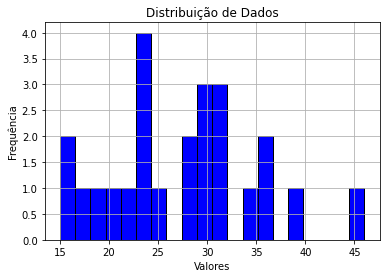

Media =  27.5
Variancia =  55.75
DesvioPadrao =  7.466592261534039
Mediana =  28.0
Minimo =  15
Maximo =  46
Soma =  660
Contagem =  24
p-valor =  0.8565154075622559
p-valor >= alpha --> Aceita H0


True

In [15]:
KolmogorovSmirnov(ProdBienalAvioes,0.05,24)


Kolmogorov-Smirnov



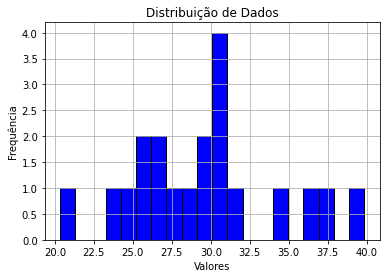

Media =  29.51569870116918
Variancia =  22.296917928610952
DesvioPadrao =  4.7219612375167745
Mediana =  29.58914488576296
Minimo =  20.322159300193153
Maximo =  39.84725904274604
Soma =  590.3139740233836
Contagem =  50
p-valor =  0.7101823091506958
p-valor >= alpha --> Aceita H0


True

In [16]:
KolmogorovSmirnov(Normal,0.05,50)


Kolmogorov-Smirnov



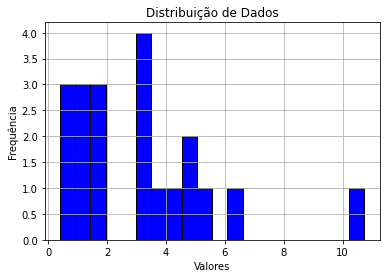

Media =  3.1732043881031755
Variancia =  5.802427413973148
DesvioPadrao =  2.408822827435249
Mediana =  3.0714130999676623
Minimo =  0.4006100233176727
Maximo =  10.73815468538373
Soma =  63.464087762063514
Contagem =  500
p-valor =  0.009774269536137581
p-valor < alpha --> Rejeita H0


False

In [17]:
KolmogorovSmirnov(gama,0.05,500)


Kolmogorov-Smirnov



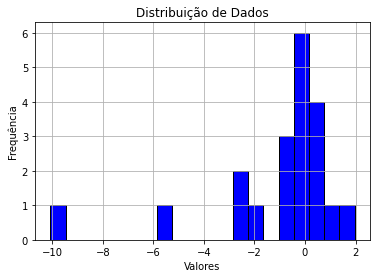

Media =  -1.0135168568719561
Variancia =  6.7196613109450976
DesvioPadrao =  2.5922309524703038
Mediana =  -0.1668466717047561
Minimo =  -10.080212490660017
Maximo =  1.9658190877980828
Soma =  -20.27033713743912
Contagem =  50
p-valor =  8.581649308325723e-05
p-valor < alpha --> Rejeita H0


False

In [18]:
KolmogorovSmirnov(cauchy,0.05,50)

#### Shapiro_Wilk

In [19]:
# Casos de teste

#ct001 - Shapiro-Wilk --> Teste com sucesso
ProdMaqAgric = np.array([52 ,50 ,36 ,40 ,30, 42, 38, 38, 52, 44, 36, 34, 50 ,42 ,34, 55, 36, 55, 42, 52, 34, 48, 55, 44 ,44 ,30 ,48 ,40, 40, 44 ,40 ,44 ,38 ,36 ,50 ,42])
#ct002 - Shapiro-Wilk --> Teste com sucesso
Normal = np.random.normal(30,5,50)
#ct003 - Shapiro-Wilk --> Teste de falha
gama = np.random.gamma(2,2,50)
#ct004 - Shapiro-Wilk --> Teste de falha
cauchy = np.random.standard_cauchy(50)



Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  42.638888888888886
Variancia =  49.00848765432099
DesvioPadrao =  7.000606234771456
Mediana =  42.0
Minimo =  30
Maximo =  55
Soma =  1535
Contagem =  36


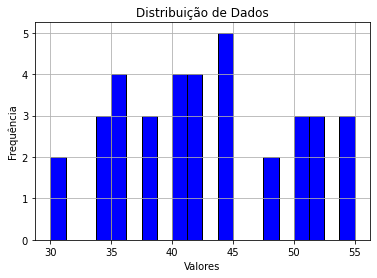


p > alpha --> Aceita H0


True

In [20]:
ShapiroWilk(ProdMaqAgric,0.05,36)


Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  31.001894428759634
Variancia =  22.844632830938277
DesvioPadrao =  4.779605928414839
Mediana =  30.036155358935893
Minimo =  22.956138435363737
Maximo =  41.890349376505064
Soma =  1550.0947214379817
Contagem =  50


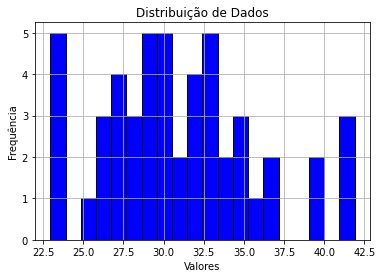


p > alpha --> Aceita H0


True

In [21]:
ShapiroWilk(Normal,0.05,50)


Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  4.620235313594657
Variancia =  9.157067508598292
DesvioPadrao =  3.02606469008815
Mediana =  4.363019733289585
Minimo =  0.37169602466761426
Maximo =  13.769534725869255
Soma =  231.01176567973283
Contagem =  50


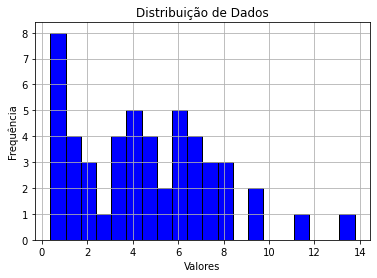


p < alpha --> Rejeita H0


False

In [22]:
ShapiroWilk(gama,0.05,50)


Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.4467457824040219
Variancia =  14.245820455127907
DesvioPadrao =  3.774363582794841
Mediana =  -0.07271356169184653
Minimo =  -5.2884028549961295
Maximo =  23.136290420925405
Soma =  22.337289120201095
Contagem =  50


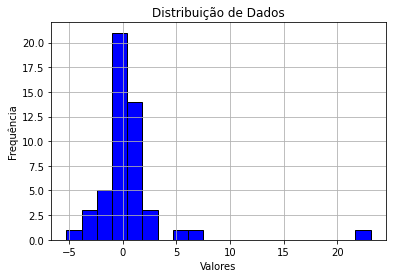


p < alpha --> Rejeita H0


False

In [23]:
ShapiroWilk(cauchy,0.05,50)

#### Teste Z

In [24]:
normal = np.random.normal(30,5,50)


Z-Score

Hipoteses:
H0 --> M =  30
H1 --> M !=  30


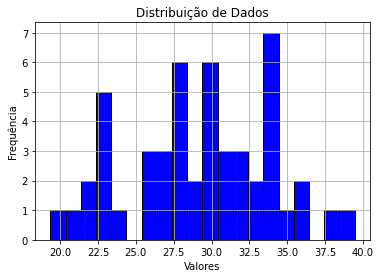


Zcalc <= Zc --> Aceita H0


True

In [25]:
#Caso de teste 001 - Teste com sucesso
Zscore(normal,0.05,30)  

Z-Score

Hipoteses:
H0 --> M =  35
H1 --> M !=  35


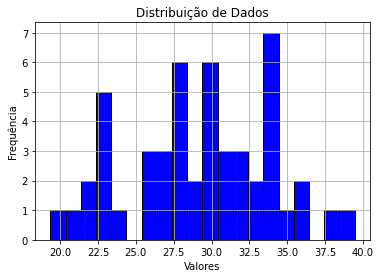


Zcalc > Zc --> Rejeita H0


False

In [26]:
#Caso de teste 002 - Teste com sucesso
Zscore(normal,0.05,35)

#### Teste Bartlett

In [27]:
Normal = np.random.normal(30,5,50)
Normal2 = np.random.normal(30,5,50)

Bartlett

Hipoteses:
H0 --> As variancias são iguais
H1 --> As variancias não são iguais

Bcalc <= X2c --> Aceita H0


True

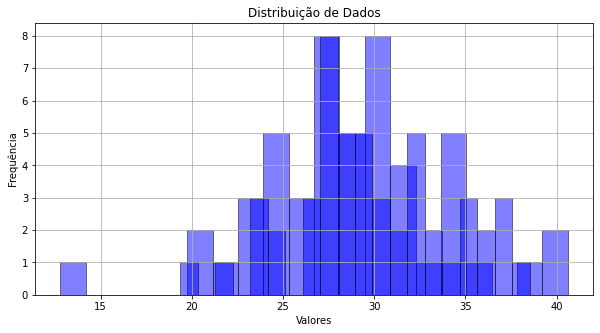

In [28]:
Bartlett([Normal,Normal2],0.05)

In [29]:
Normal = np.random.normal(30,5,50)
Normal2 = np.random.normal(30,10,50)

Bartlett

Hipoteses:
H0 --> As variancias são iguais
H1 --> As variancias não são iguais

Bcalc > X2c --> Rejeita H0


False

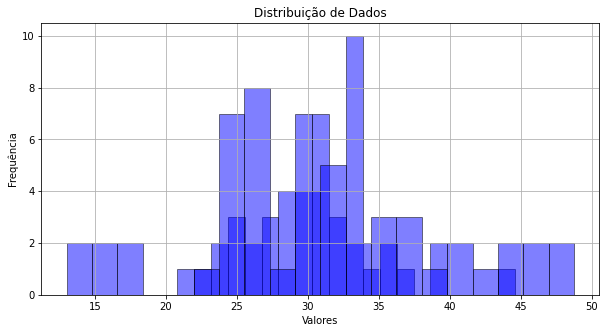

In [30]:
Bartlett([Normal,Normal2],0.05)

#### T_student_Independente

In [31]:
#ct001 - Sucesso Bartlett Sucesso T

t11  = np.random.normal(30,5,50)
t12 = np.random.normal(30,5,50)


#ct002 - Falha Bartlett Sucesso T

t21 = np.random.normal(30,5,500)
t22 = np.random.normal(30,10,500)


#ct003 - Sucesso Bartlett Falha T

t31 = np.random.normal(30,5,50)
t32 = np.random.normal(40,5,50)

#ct004 - Falha Bartlett Falha T

t41 = np.random.normal(30,5,50)
t42 = np.random.normal(40,10,50)

T-Student - Comparação de médias populacionais Independentes

Hipoteses:
H0 --> M1 = M2 
H1 --> M1 != M2
Médias: 31.07212847665928 30.13850920777861
Variâncias: 24.74715093126536 18.03757547324242
Desvios Padrões: 4.974650835110476 4.247066690463245
Máximos: 44.265263901397695 39.449745423635314
Mínimos: 20.29296470996026 19.19165881103126
Somas: 1553.606423832964 1506.9254603889306
Contagens: 50 50
Bartlett

Hipoteses:
H0 --> As variancias são iguais
H1 --> As variancias não são iguais

Bcalc <= X2c --> Aceita H0
Caso 2 --> Sigma²1 == Sigma²2


Talc >= Tc --> Aceita H0


True

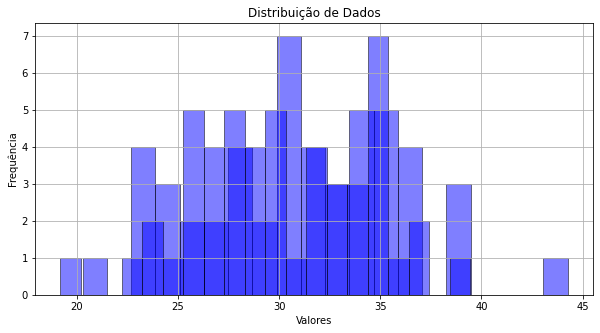

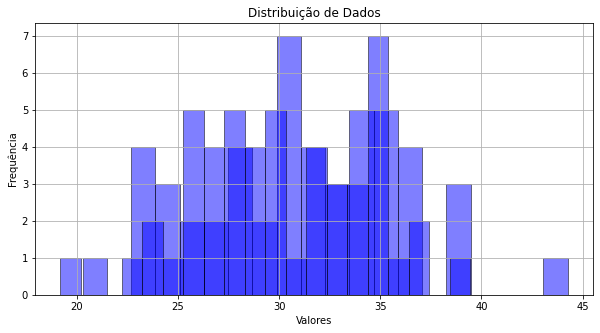

In [32]:
T_student_Independente(t11,t12,0.05)

T-Student - Comparação de médias populacionais Independentes

Hipoteses:
H0 --> M1 = M2 
H1 --> M1 != M2
Médias: 29.876351884412507 29.833021559312737
Variâncias: 24.17837674107795 100.48032030915466
Desvios Padrões: 4.917151283118911 10.023987246059058
Máximos: 44.86017688748572 59.645388316834435
Mínimos: 12.83986810081009 0.652935597609094
Somas: 14938.175942206253 14916.510779656368
Contagens: 500 500
Bartlett

Hipoteses:
H0 --> As variancias são iguais
H1 --> As variancias não são iguais

Bcalc > X2c --> Rejeita H0
Caso 1 --> Sigma²1 != Sigma²2


Wcalc < Wc --> Rejeita H0


False

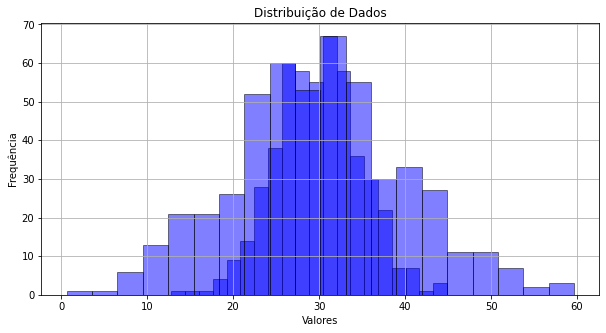

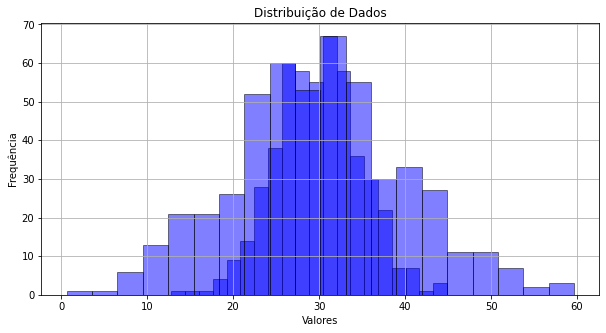

In [33]:
T_student_Independente(t21,t22,0.05)

T-Student - Comparação de médias populacionais Independentes

Hipoteses:
H0 --> M1 = M2 
H1 --> M1 != M2
Médias: 30.458076096558635 39.364344672918335
Variâncias: 31.939477825426014 15.383505946470777
Desvios Padrões: 5.6515022627108635 3.9221812740451933
Máximos: 43.86472112660781 50.747227896051506
Mínimos: 17.09777018045106 32.08338646008492
Somas: 1522.9038048279317 1968.2172336459168
Contagens: 50 50
Bartlett

Hipoteses:
H0 --> As variancias são iguais
H1 --> As variancias não são iguais

Bcalc > X2c --> Rejeita H0
Caso 1 --> Sigma²1 != Sigma²2


Wcalc < Wc --> Rejeita H0


False

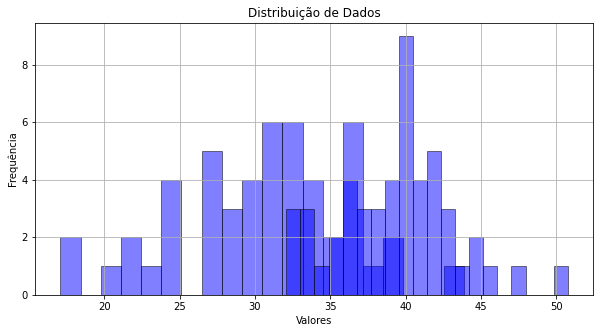

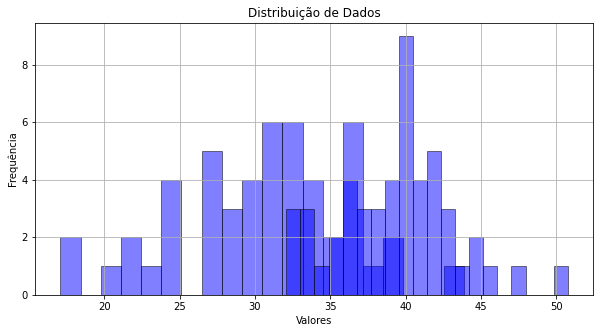

In [34]:
T_student_Independente(t31,t32,0.05)

T-Student - Comparação de médias populacionais Independentes

Hipoteses:
H0 --> M1 = M2 
H1 --> M1 != M2
Médias: 30.458076096558635 39.364344672918335
Variâncias: 31.939477825426014 15.383505946470777
Desvios Padrões: 5.6515022627108635 3.9221812740451933
Máximos: 43.86472112660781 50.747227896051506
Mínimos: 17.09777018045106 32.08338646008492
Somas: 1522.9038048279317 1968.2172336459168
Contagens: 50 50
Bartlett

Hipoteses:
H0 --> As variancias são iguais
H1 --> As variancias não são iguais

Bcalc > X2c --> Rejeita H0
Caso 1 --> Sigma²1 != Sigma²2


Wcalc < Wc --> Rejeita H0


False

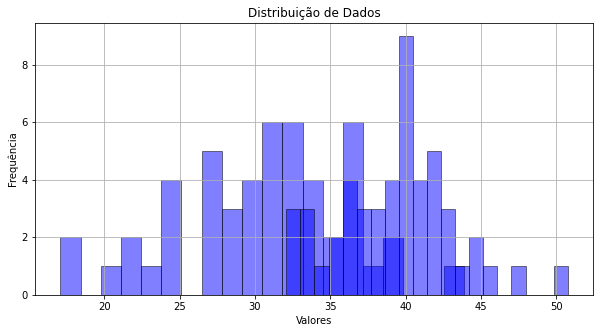

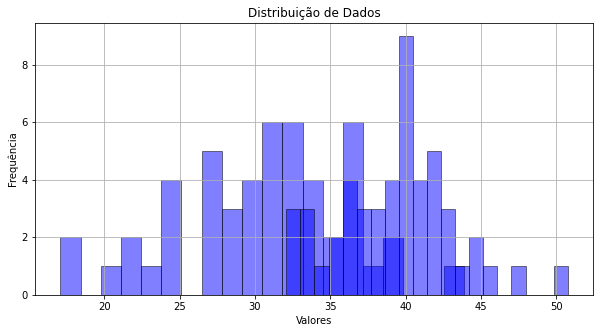

In [35]:
T_student_Independente(t31,t32,0.05)

#### T_student_Emparelhada

In [44]:
#ct001 - Sucesso KS Sucesso Bartlet Sucesso T

t11  = np.random.normal(30,5,50)
t12 = np.random.normal(30,5,50)


#ct002 - Sucesso KS Sucesso Bartlet Falha T

t21 = np.random.normal(30,5,50)
t22 = np.random.normal(40,5,50)


#ct003 - Sucesso KS Falha Bartlet

t31 = np.random.normal(30,5,500)
t32 = np.random.normal(30,10,500)
 
#ct004 - Falha KS

t41 =  np.random.gamma(2,2,20)
t42 =  np.random.gamma(2,2,20)







T-Student - Comparação de médias populacionais Emparelhadas

Hipoteses:
H0 --> Md = 0 
H1 --> Md != 0

Kolmogorov-Smirnov

p-valor =  0.9797667264938354
p-valor >= alpha --> Aceita H0

Kolmogorov-Smirnov

p-valor =  0.6190462708473206
p-valor >= alpha --> Aceita H0
Bartlett

Hipoteses:
H0 --> As variancias são iguais
H1 --> As variancias não são iguais

Bcalc <= X2c --> Aceita H0
Tc =  2.009575234489209
Tcalc =  -6.298529232698723

Talc >= Tc --> Aceita H0


True

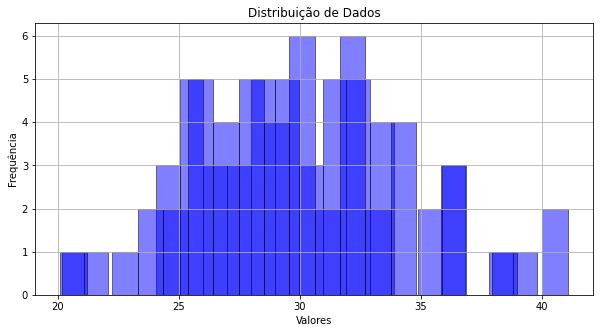

In [37]:
T_student_rols_Emparelhadas(t11,t12,0.05)

T-Student - Comparação de médias populacionais Emparelhadas

Hipoteses:
H0 --> Md = 0 
H1 --> Md != 0

Kolmogorov-Smirnov

p-valor =  0.28671491146087646
p-valor >= alpha --> Aceita H0

Kolmogorov-Smirnov

p-valor =  0.826234757900238
p-valor >= alpha --> Aceita H0
Bartlett

Hipoteses:
H0 --> As variancias são iguais
H1 --> As variancias não são iguais

Bcalc <= X2c --> Aceita H0
Tc =  2.009575234489209
Tcalc =  -1813.3110293387376

Talc >= Tc --> Aceita H0


True

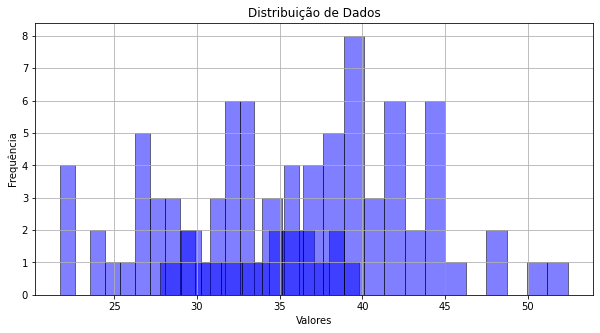

In [40]:
T_student_rols_Emparelhadas(t21,t22,0.05)

In [41]:
T_student_rols_Emparelhadas(t31,t32,0.05)

T-Student - Comparação de médias populacionais Emparelhadas

Hipoteses:
H0 --> Md = 0 
H1 --> Md != 0

Kolmogorov-Smirnov

p-valor =  0.23519366979599
p-valor >= alpha --> Aceita H0

Kolmogorov-Smirnov

p-valor =  0.189381405711174
p-valor >= alpha --> Aceita H0
Bartlett

Hipoteses:
H0 --> As variancias são iguais
H1 --> As variancias não são iguais

Bcalc > X2c --> Rejeita H0
Amostras não possuem variâncias iguais


In [47]:
T_student_rols_Emparelhadas(t41,t42,0.05)

T-Student - Comparação de médias populacionais Emparelhadas

Hipoteses:
H0 --> Md = 0 
H1 --> Md != 0

Kolmogorov-Smirnov


Dcalc < Dtab --> Aceita H0

Kolmogorov-Smirnov


Dcalc < Dtab --> Aceita H0
Bartlett

Hipoteses:
H0 --> As variancias são iguais
H1 --> As variancias não são iguais

Bcalc > X2c --> Rejeita H0
Amostras não possuem variâncias iguais
